In [1]:
import numpy as np

In [81]:
import cv2
import matplotlib.pyplot as plt
import glob
def im_with_bbox(img_rgb, bbox_height_start, bbox_height_end,
                     bbox_width_start, bbox_width_end, ax=None, color=(0, 255, 255)):
    img_bgr_uint8 = cv2.cvtColor(np.uint8(255*img_rgb), cv2.COLOR_RGB2BGR)
    cv2.rectangle(img_bgr_uint8, (bbox_width_start, bbox_height_start), (bbox_width_end-1, bbox_height_end-1),
                  color, thickness=2)
    img_rgb_uint8 = img_bgr_uint8[...,::-1]
    img_rgb_float = np.float32(img_rgb_uint8) / 255
    #plt.imshow(img_rgb_float)
    #plt.axis('off')
    if ax is not None:
        ax.imshow(img_rgb_float)
        ax.axis('off')
    plt.imshow(img_rgb_float)

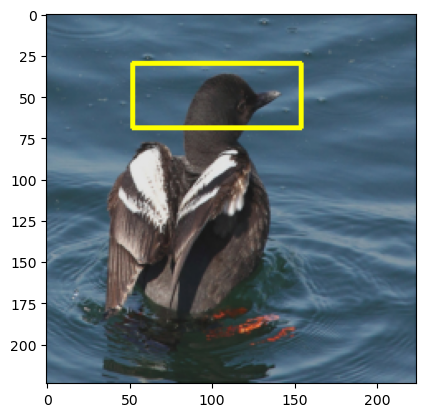

In [82]:
bbx = np.load("local_analysis/handful_of_images/058.Pigeon_Guillemot/Resnet34/002/15push0.7530.pth/most_activated_prototypes/top-1_activated_prototype_bbox.npy")
guillemot = plt.imread('local_analysis/handful_of_images/058.Pigeon_Guillemot/Resnet34/002/15push0.7530.pth/original_img.png')

im_with_bbox(img_rgb=guillemot,
            bbox_height_start=bbx[0],
            bbox_height_end=bbx[1],
            bbox_width_start=bbx[2],
            bbox_width_end=bbx[3], color=(0, 255, 255))

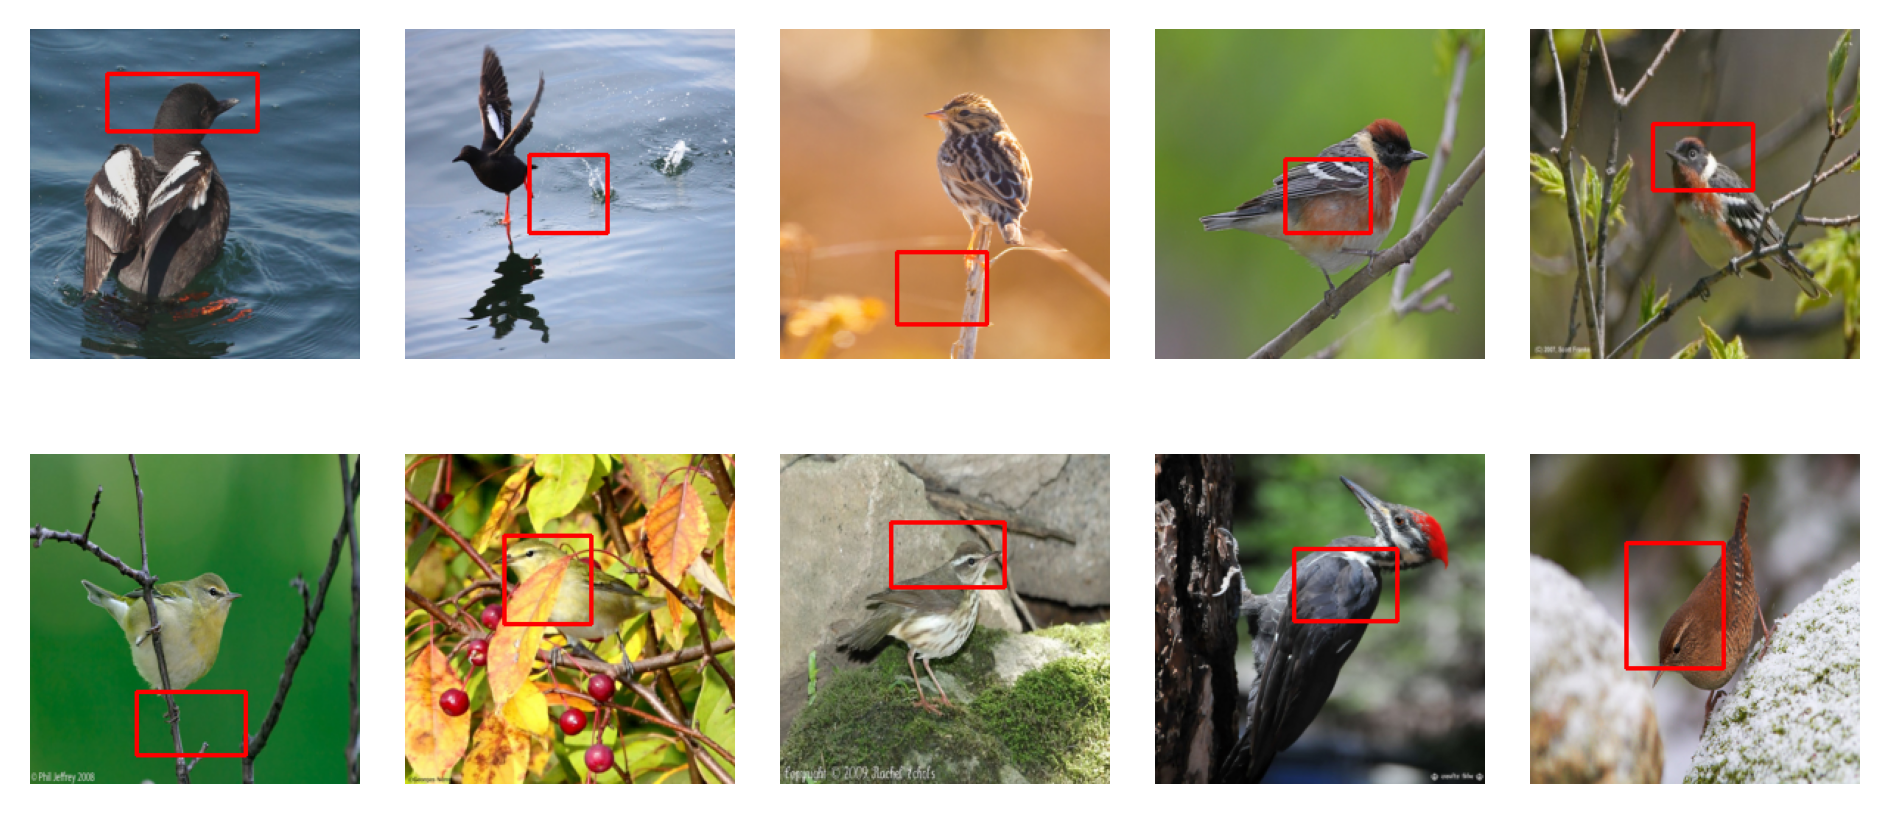

In [100]:
img_paths = glob.glob('local_analysis/handful_of_images/*/Resnet34/002/15push0.7530.pth/original_img.png')
bboxes = glob.glob("local_analysis/handful_of_images/*/Resnet34/002/15push0.7530.pth/most_activated_prototypes/top-1*.npy")
fig, ax = plt.subplots(2,5, dpi=300, tight_layout=True)
ax = ax.ravel()
for i, (img_path, bbx_path) in enumerate(zip(img_paths, bboxes)):
    img = plt.imread(img_path)
    bbx = np.load(bbx_path)
    im_with_bbox(img_rgb=img,
                 bbox_height_start=bbx[0],
                 bbox_height_end=bbx[1],
                 bbox_width_start=bbx[2],
                 bbox_width_end=bbx[3], ax=ax[i], color=(0, 0, 255))
plt.savefig('figures/ProtoP_bboxes.png', bbox_inches='tight')

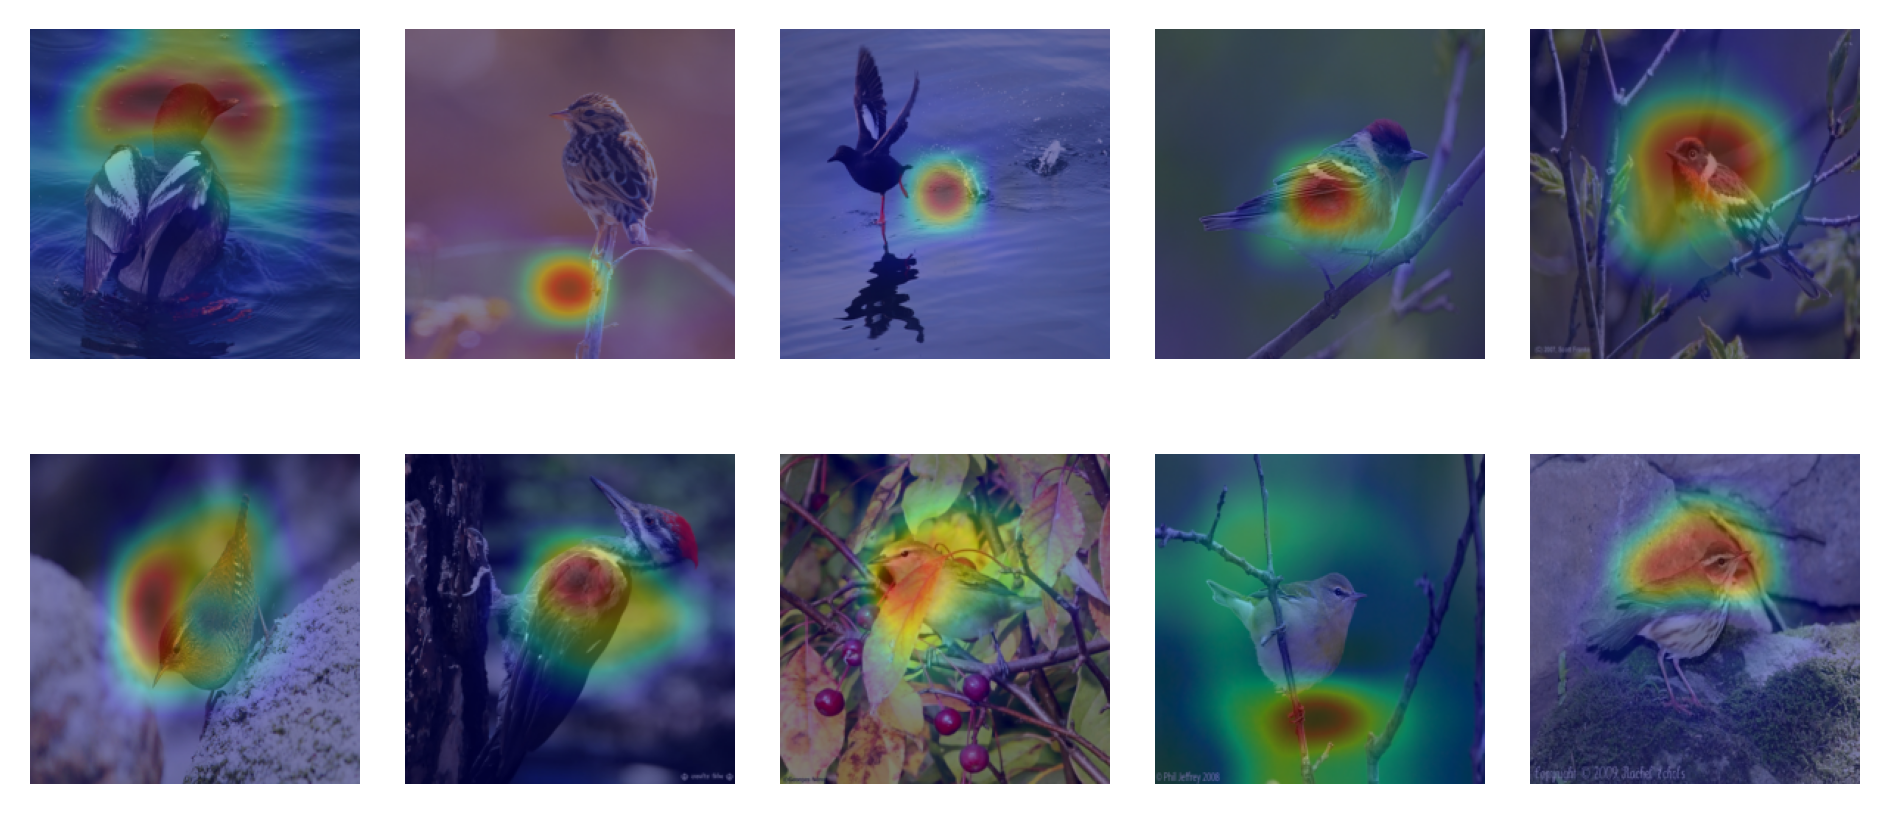

In [126]:
heatmaps = glob.glob('local_analysis/handful_of_images/*/Resnet34/002/15push0.7530.pth/most_activated_prototypes/prototype_activation_map_by_top-1_prototype.png')
fig, ax = plt.subplots(2,5, dpi=300, tight_layout=True)
ax = ax.ravel()

ax[0].imshow(plt.imread(heatmaps[0]))
ax[1].imshow(plt.imread(heatmaps[2]))
ax[2].imshow(plt.imread(heatmaps[1]))
ax[3].imshow(plt.imread(heatmaps[3]))
ax[4].imshow(plt.imread(heatmaps[4]))
ax[5].imshow(plt.imread(heatmaps[9]))
ax[6].imshow(plt.imread(heatmaps[8]))
ax[7].imshow(plt.imread(heatmaps[6]))
ax[8].imshow(plt.imread(heatmaps[5]))
ax[9].imshow(plt.imread(heatmaps[7]))

for i, heatmap in enumerate(heatmaps):
    ax[i].set_axis_off()
plt.savefig('figures/ProtoP_heatmaps.png', bbox_inches='tight')